In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("tested.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.drop(df.columns[[0,3,6,9,10,11,7,8]] , axis = 1,inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,34.5
1,1,3,female,47.0
2,0,2,male,62.0
3,0,3,male,27.0
4,1,3,female,22.0


In [8]:
df['Sex'].replace({'male':0 , 'female':1} , inplace=True)

In [9]:
df

,Survived,Pclass,Sex,Age
0,0,3,0,34.5
1,1,3,1,47.0
2,0,2,0,62.0
3,0,3,0,27.0
4,1,3,1,22.0
...,...,...,...,...
413,0,3,0,NaN
414,1,1,1,39.0
415,0,3,0,38.5
416,0,3,0,NaN


In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [11]:
df

,Survived,Pclass,Sex,Age
0,0,3,0,34.5
1,1,3,1,47.0
2,0,2,0,62.0
3,0,3,0,27.0
4,1,3,1,22.0
...,...,...,...,...
413,0,3,0,21.0
414,1,1,1,39.0
415,0,3,0,38.5
416,0,3,0,21.0


In [12]:
x = df.iloc[:,1:4]

In [13]:
x

,Pclass,Sex,Age
0,3,0,34.5
1,3,1,47.0
2,2,0,62.0
3,3,0,27.0
4,3,1,22.0
...,...,...,...
413,3,0,21.0
414,1,1,39.0
415,3,0,38.5
416,3,0,21.0


In [14]:
y = df.iloc[:,0]

In [15]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state= 42,test_size=0.33)

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
treemodel = DecisionTreeRegressor()

In [20]:
treemodel.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [21]:
from sklearn import tree

[Text(0.5, 0.75, 'x[1] <= 0.5\nsquared_error = 0.235\nsamples = 280\nvalue = 0.379'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 174\nvalue = 0.0'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 106\nvalue = 1.0')]

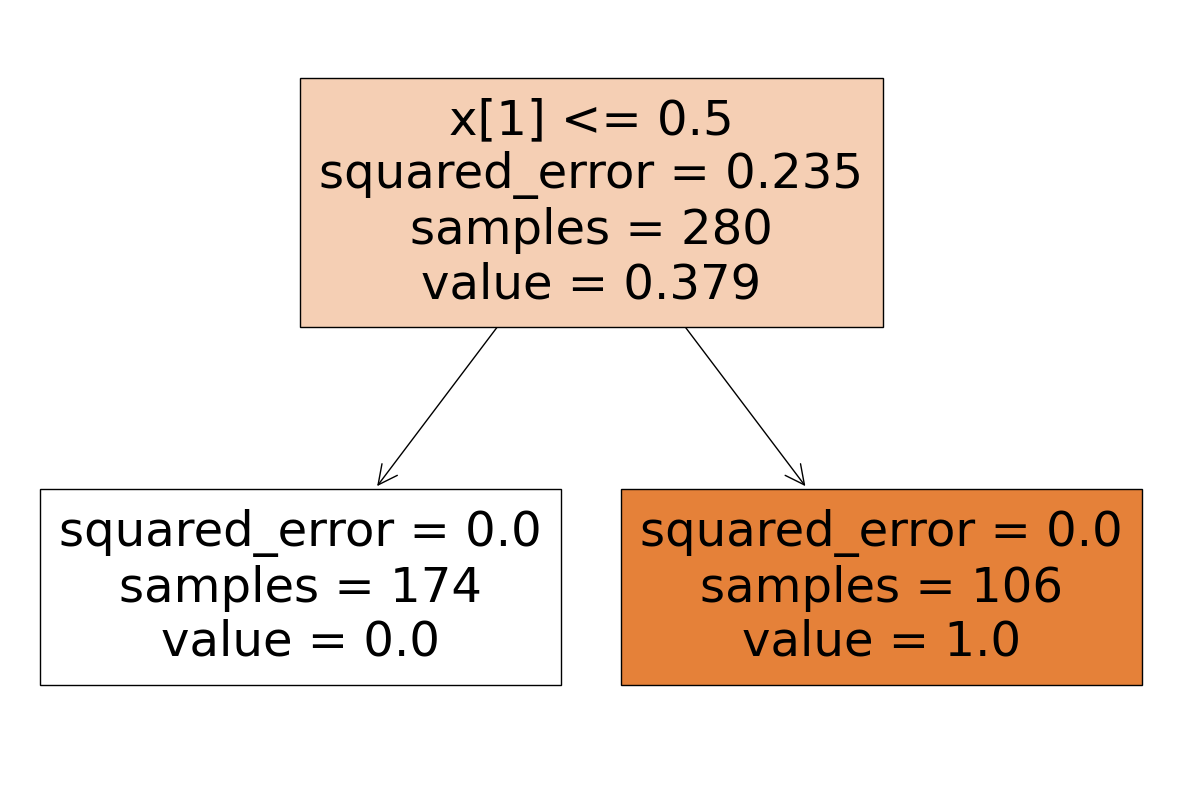

In [22]:
plt.figure(figsize = (15,10))
tree.plot_tree(treemodel , filled = True)

In [23]:
ypred = treemodel.predict(xtest)
ypred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0.])

In [24]:
from sklearn.metrics import accuracy_score , classification_report

In [25]:
score = accuracy_score(ypred , ytest)

In [26]:
score

1.0

In [27]:
print(classification_report(ypred , ytest))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        92
         1.0       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

